# Тестовое задание

В папке с заданием два датасета - data_orders - содержит выборку данных по заказам клиентов и включает такие колонки как:
* order_datetime -  время заказа
* order_gk - номер заказа
* order_status_key - статус (4 - отменен клиентом, 9 - отменен системой (reject))
* is_courier_assigned_key - был ли назначен курьер
* cancellations_time_in_seconds - сколько секунд прошло до отмены

data_offers - содержит пары номер заказа - ID оффера, который был предложен курьеру по данному заказу.


В момент когда клиент нажимает на кнопку "Заказать" в приложении, система матчинга подыскивает наиболее релевантых курьеров и предлагаем им заказ. В задании предлагается исследовать некоторые метрики неудачных заказов

Задание является проверочным и не имеет ничего общего с реальной работой курьеров

**0.** Подготовка данных, проверка выбросов, аномалий

In [480]:
## CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [481]:
#открываем файл data_orders и смотрим св-ва датасета
#опишите основные статистики датасета и его особенности
df_orders = pd.read_csv('data_orders.csv')
#далее ваш код

In [482]:
#Работаем с датасетом:
#df_orders

In [483]:
print(df_orders.dtypes) #смотрим тип данных
print(df_orders.columns) #смотрим соответствие названия столбцов, количество строк
print(df_orders.shape)

order_datetime                    object
order_gk                           int64
order_status_key                   int64
is_courier_assigned_key            int64
cancellations_time_in_seconds    float64
dtype: object
Index(['order_datetime', 'order_gk', 'order_status_key',
       'is_courier_assigned_key', 'cancellations_time_in_seconds'],
      dtype='object')
(10716, 5)


In [484]:
#Проверим датасет на наличие пустых значение
df_orders.isna().sum()

order_datetime                      0
order_gk                            0
order_status_key                    0
is_courier_assigned_key             0
cancellations_time_in_seconds    3409
dtype: int64

In [485]:
#значения NAN присутствуют в столбце cancellations_time_in_seconds

In [549]:
#заменим строки с NaN на 0
df_orders_clear = df_orders.fillna(0)  

<AxesSubplot:>

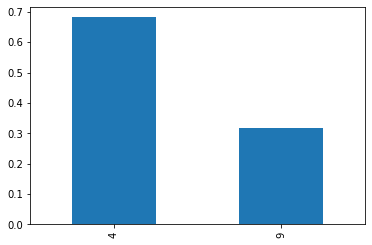

In [152]:
#частотный анализ по отменам
df_orders_clear.order_status_key.value_counts(normalize = True).plot(kind='bar')

In [ ]:
#~70% заказов отменены клиентами

<AxesSubplot:>

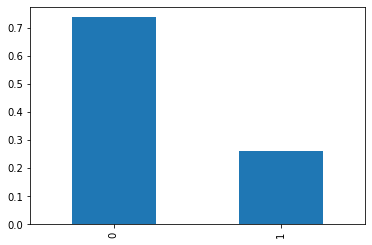

In [153]:
#частотный анализ назначения курьера
df_orders_clear.is_courier_assigned_key.value_counts(normalize = True).plot(kind='bar')

In [ ]:
#для ~74% заказов не было назначено курьера

In [154]:
#кореляция между статусом заказа и временем до отмены
print(df_orders_clear['order_status_key'].corr(df_orders_clear['cancellations_time_in_seconds']))
#кореляция между назначением курьера и временем до отмены
print(df_orders_clear['is_courier_assigned_key'].corr(df_orders_clear['cancellations_time_in_seconds']))
#кореляция между статусом заказа и назначением курьеар
print(df_orders_clear['is_courier_assigned_key'].corr(df_orders_clear['order_status_key']))

-0.3851975594566629
0.39381036721042306
-0.40623713488382507


In [253]:
df_orders_clear.corr()

,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
order_gk,1.000000,0.063620,-0.109378,-0.061110
order_status_key,0.063620,1.000000,-0.406237,-0.385198
is_courier_assigned_key,-0.109378,-0.406237,1.000000,0.393810
cancellations_time_in_seconds,-0.061110,-0.385198,0.393810,1.000000


In [ ]:
 #Корреляция между данными слабая. Однозначного ответа по взаимозавсисмости величин пока дать невозможно. 

In [155]:
#Статистика по числовым данным времени
df_orders_clear.cancellations_time_in_seconds.describe()

count    10716.000000
mean       107.663027
std        190.918174
min          0.000000
25%          0.000000
50%         47.000000
75%        139.000000
max       4303.000000
Name: cancellations_time_in_seconds, dtype: float64

In [ ]:
#видно, что 75% квартиль всего 139, тогда как максимальное - 4303. Можно сделать вывод, что имееются выбросы

<AxesSubplot:xlabel='cancellations_time_in_seconds', ylabel='Density'>

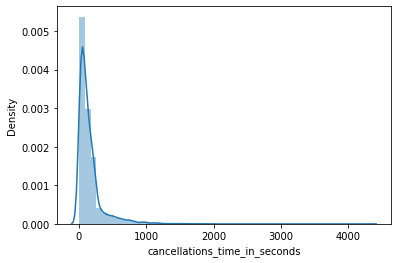

In [401]:
#построение гистограмм
#df_orders_clear.cancellations_time_in_seconds
#df_orders_clear.cancellations_time_in_seconds.hist()
sns.distplot(df_orders_del.cancellations_time_in_seconds)

<AxesSubplot:xlabel='cancellations_time_in_seconds'>

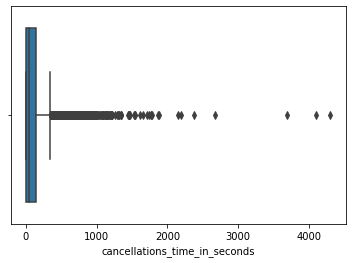

In [382]:
#построим boxplot. Видим большое количество выбросов
#plt.boxplot([df_orders_clear.cancellations_time_in_seconds])
sns.boxplot(x = df_orders_clear.cancellations_time_in_seconds)

# Рекомендации базовые 

1. Время отмены пользователем сформированого заказа, при условии, что курьер назначен, зависит от времени ожидания курьера. Предположительно, решение видится в улучшении алгоритмов системы матчинга для поиска наиболее релевантых курьеров.
2. Рост числа отмен заказов возрастает ближе к времени начала рабочего дня (~08:00 am). Предположительно, решение видится в увеличении количества курьеров в указанный промежуток времени.
3. Из данных выявлено, что для одного номера заказа имеется различные оффер ID. На данном этапе хотелось бы понять механику системы: каким-образом назначются оффер, имеется ли возможность отменить оффер для курьера и т.п. Мб даже получить данные о времени предложения оффера и, например, в случае отказа курьером от оффера - в какое время формируется другой оффер. 
4. Замечена сильная корреляция в количествах "фейлов"  между отказами пользователя и отказами системы. Хотелось бы разобраться по каким условиям происходит reject. Выдерживает ли ресурс поток клиентов/заявок/заказов...

In [4]:
#изучите датасеты и сформируйте рекомендации по улучшению бизнеса
#все рекомендации отразите как ячейкой типа raw перед которым идет аналитический код с визуализацией и подтверждением вашей гипотезы
#далее ваш код

# Рекомендации по конкретной задаче

1. Среднее время до отмены заказа с назначенным курьером: 111.5969776609724.
Среднее время до отмены заказа без назначенного курьера: 98.02446877012234. 
Однако интреснее взглянуть на величину отклонения. std по времени до отмены больше для заказов с назначенным курьером.
2. Количество заказов отмененных без оффера для курьера составляет: 3.2 % от общего числа заказов.
2. По данным датасета offers ~80% заказов которым были сформированы офферы в датасете orders учтены как is_courier_assigned_key = 0 (т.е. не назначены курьеры) - противоречие!

Видим, что есть пустые значения в столбце с секундами до отмены

In [136]:
#проверим при каком статусе есть пробелы
df_orders.order_status_key.loc[df_orders.cancellations_time_in_seconds.isnull() == True].unique()

array([9], dtype=int64)

Есть пробелы только при статусе  - 9 - отменен системой (reject))

In [7]:
#проверим есть или выбросы (аномалии) во времени до отмены заказов, используя "ящик с усами" из библиотеки Seaborn,
#отбросив строки с пустыми значениями
#визуализируйте и опишите
#далее ваш код


In [550]:
#для удаления строк с NAN:
df_orders_del = df_orders.dropna()  
print("Количество строк сократилось на:", df_orders.shape[0] - df_orders_del.shape[0])

Количество строк сократилось на: 3409


In [551]:
#преобразуем float в инт, для отбрасывания выбросов
df_orders_del_int = df_orders_del.astype({"cancellations_time_in_seconds": int})
df_orders_del_int.dtypes


order_datetime                   object
order_gk                          int64
order_status_key                  int64
is_courier_assigned_key           int64
cancellations_time_in_seconds     int32
dtype: object

In [553]:
#При помощи метода quantile получаем соответствующую нижнюю и верхнюю границы, а затем выводим всё, что выходит за их рамки:

low = df_orders_del_int.cancellations_time_in_seconds.quantile(q=0.025)
upp = df_orders_del_int.cancellations_time_in_seconds.quantile(q=0.975)
print("Нижняя гранинца:", low)
print("Верхняя гранинца:", upp)

Нижняя гранинца: 8.0
Верхняя гранинца: 741.0


In [554]:
df_orders_del_int_filter = df[(df_orders_del_int.loc[:, 'cancellations_time_in_seconds'] < upp) & (df_orders_del_int.loc[:, 'cancellations_time_in_seconds'] > low)]
print(df_orders_del_int_filter.cancellations_time_in_seconds.describe()) #смотрим параметры

count    6893.00000
mean      138.19324
std       132.24338
min         9.00000
25%        48.00000
50%        99.00000
75%       183.00000
max       737.00000
Name: cancellations_time_in_seconds, dtype: float64


<AxesSubplot:xlabel='cancellations_time_in_seconds'>

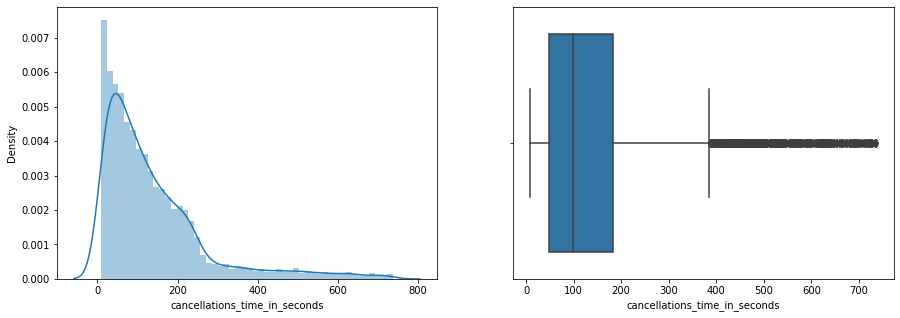

In [561]:
#визуализация данных, без очевидных выбросов
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(df_orders_del_int_filter.cancellations_time_in_seconds)
plt.subplot(122)
sns.boxplot(x = df_orders_del_int_filter.cancellations_time_in_seconds)

In [ ]:
#величина времени ожидания до отказа распределена экспоненциально

<AxesSubplot:>

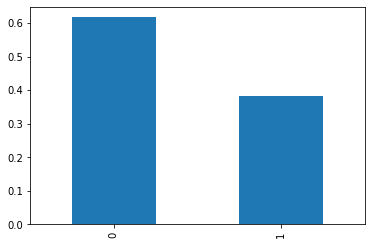

In [558]:
#частотный анализ назначения курьера
df_orders_del_int_filter.is_courier_assigned_key.value_counts(normalize = True).plot(kind='bar')

count    4254.000000
mean      111.657499
std        89.416225
min         9.000000
25%        45.000000
50%        93.000000
75%       160.000000
max       735.000000
Name: cancellations_time_in_seconds, dtype: float64


<AxesSubplot:>

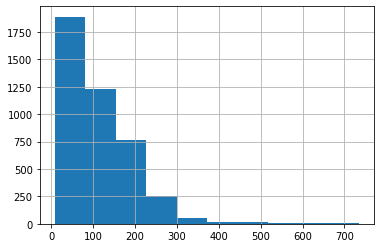

In [577]:
#60% заказов были отменены пользователями по причине отсутствия назначения курьера

#Проанализируем время до отмены пользователем при отсутствии назначения курьера
df_orders_del_int_filter_0 = df_orders_del_int_filter[df_orders_del_int_filter.loc[:, 'is_courier_assigned_key'] == 0]
print(df_orders_del_int_filter_0.cancellations_time_in_seconds.describe())
df_orders_del_int_filter_0.cancellations_time_in_seconds.hist()

count    2639.000000
mean      180.968170
std       172.724672
min         9.000000
25%        51.000000
50%       114.000000
75%       251.000000
max       737.000000
Name: cancellations_time_in_seconds, dtype: float64


<AxesSubplot:>

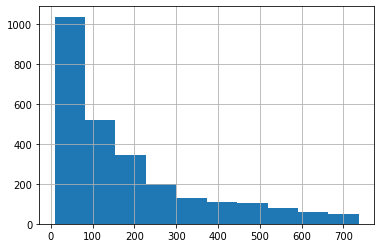

In [576]:
#Проанализируем время до отмены пользователем заказа при назначенном курьере
df_orders_del_int_filter_1 = df_orders_del_int_filter[df_orders_del_int_filter.loc[:, 'is_courier_assigned_key'] == 1]
print(df_orders_del_int_filter_1.cancellations_time_in_seconds.describe())
df_orders_del_int_filter_1.cancellations_time_in_seconds.hist()

In [ ]:
#Из гистограмм, видно, что значения времени до отмены заказа при уже назначенном курьере имеют большую величну стандартного отклонения. К тому же наблюдается большее количество заказов, время ожидания которых превышает 300 секунд: 

In [713]:
df_0 = df_orders_del_int_filter_0.cancellations_time_in_seconds[df_orders_del_int_filter_0.loc[:, 'cancellations_time_in_seconds'] > 300].count()
df_1 = df_orders_del_int_filter_1.cancellations_time_in_seconds[df_orders_del_int_filter_1.loc[:, 'cancellations_time_in_seconds'] > 300].count()
print("Количество заказов время ожидания до отмены которых > 300 с (без назначенного курьера):", df_0)
print("Количество заказов время ожидания до отмены которых > 300 с (c назначенным курьером):", df_1)

Количество заказов время ожидания до отмены которых > 300 с (без назначенного курьера): 110
Количество заказов время ожидания до отмены которых > 300 с (c назначенным курьером): 530


______________________

In [ ]:
Таким образом, можно сделать вывод о том, что отмены заказа при уже назначенном курьере зависит от длительности ожидания курьера.

_____________________________________

In [137]:
#открываем файл data_offers и смотрим св-ва датасета
#опишите свойства датасета
df_offers = pd.read_csv('data_offers.csv')
#далее ваш код
df_offers

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [138]:
#Проверим датасет на наличие пустых значение
df_offers.isnull().sum()

order_gk    0
offer_id    0
dtype: int64

In [ ]:
#NAN значений нет

In [602]:
#Проверим датасет на наличие одинаковых значений
print(df_offers.order_gk.duplicated().sum())
print(df_offers.offer_id.duplicated().sum())

236396
0


<AxesSubplot:>

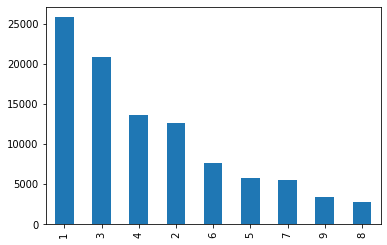

In [639]:
#Подсчет дубликаты в отдельный датасет
df_offers.order_gk.value_counts()
df_offers.order_gk.value_counts().value_counts().plot(kind = 'bar')
#частотное распределение.... видим дубликаты... не понятно, пока, как это использовать....


In [777]:
#Выведем дубликаты в отдельный датасет
df_total_ = df_offers.merge(df_orders_dd)
df_total_dubl = df_total_[df_total_.order_gk.duplicated()]
df_total_dubl.sort_values(by = "order_gk").head(15)

,order_gk,offer_id,order_datetime,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
22079,3000551431657,300050591296,2020-07-22 00:13:12,4,1,31.0
22080,3000551431657,300050591295,2020-07-22 00:13:12,4,1,31.0
25847,3000551431687,300050591328,2020-07-22 00:17:05,4,1,1075.0
25846,3000551431687,300050591325,2020-07-22 00:17:05,4,1,1075.0
25845,3000551431687,300050591322,2020-07-22 00:17:05,4,1,1075.0
1081,3000551456281,300050591513,2020-07-22 00:35:26,4,1,116.0
1083,3000551456281,300050591509,2020-07-22 00:35:26,4,1,116.0
1082,3000551456281,300050591510,2020-07-22 00:35:26,4,1,116.0
28242,3000551456507,300050591724,2020-07-22 01:04:26,4,1,164.0
28241,3000551456507,300050591729,2020-07-22 01:04:26,4,1,164.0


<AxesSubplot:>

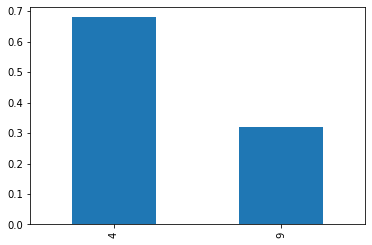

In [772]:
#частотный анализ по отменам
df_total_dubl.order_status_key.value_counts(normalize = True).plot(kind='bar')

<AxesSubplot:>

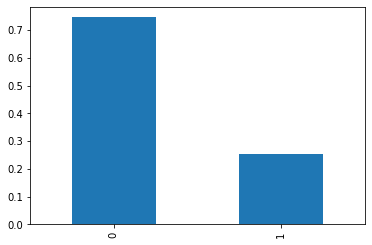

In [773]:
df_total_dubl.is_courier_assigned_key.value_counts(normalize = True).plot(kind='bar')

_____________________________

In [774]:
#из датасета видно, что имеются различные оффер ID для одинаковых номеров заказа. 

____________________________

**1.** Для всех ли заказов нашлись офферы курьерам?

In [715]:
#вопрос трактуется так: Для всех ли заказов имеется присвоенный оффер ID.


In [648]:
#удаляем повторения в номерах заказа в датасете offers
print(df_offers.shape)
df_offers_dd = df_offers.drop_duplicates(subset=['order_gk'], keep='last') #оставляем последний в повторах
print(df_offers_dd.shape)

(334363, 2)
(97967, 2)


In [649]:
#удаляем повторения в номерах заказа в датасете orders
print(df_orders_clear.shape)
df_orders_dd = df_orders_clear.drop_duplicates(subset=['order_gk'])
print(df_orders_dd.shape)

(10716, 5)
(10716, 5)


In [ ]:
#повторов в номерах заказа в датасете order нет.

In [175]:
#объединение датафреймов по одинаковым order_gk - номерам заказа
df_total = df_offers_dd.merge(df_orders_dd)
df_total.shape

(7610, 6)

In [641]:
df_total.head() #датасет с заказами и предложенными оффер ID для курьера

,order_gk,offer_id,order_datetime,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
0,3000630031091,300052279972,2020-07-22 19:32:20,9,0,0.0
1,3000592321032,300051368648,2020-07-22 15:31:25,4,1,22.0
2,3000598836460,300051637409,2020-07-22 00:59:12,4,0,10.0
3,3000583467114,300051000243,2020-07-22 08:35:21,4,1,93.0
4,3000553146538,300050620830,2020-07-22 22:55:24,4,0,18.0


<AxesSubplot:>

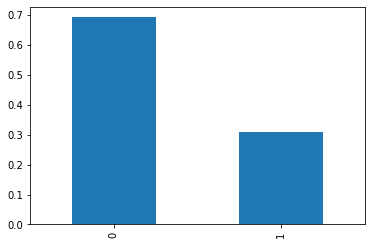

In [560]:
#частотный анализ назначения курьера
df_total.is_courier_assigned_key.value_counts(normalize = True).plot(kind='bar')

In [647]:
df_offers_dd.shape

(97967, 2)

In [655]:
print("Количество заказов без оффера для курьера:", df_orders_dd.shape[0] - df_total.shape[0])
print("Что составляет:", ((df_orders_dd.shape[0] - df_total.shape[0]) / df_offers_dd.shape[0]) * 100 , "% от общего числа заказов")

Количество заказов без оффера для курьера: 3106
Что составляет: 3.1704553574162726 % от общего числа заказов


In [167]:
#далее ваш код

_________________________________________

**2.** Если нашлись такие заказы, на которых не назначены курьеры, то чего больше - отмен клиентом или реджектов системы?

In [ ]:
#далее ваш код

In [223]:
df_total_not = pd.concat([df_offers_dd, df_orders_dd]).drop_duplicates(subset=['order_gk'], keep=False)
df_total_not.dropna(subset=['cancellations_time_in_seconds'])

,order_gk,offer_id,order_datetime,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
4,3000583140877,NaN,2020-07-22 21:24:45,9.0,0.0,0.0
7,3000582791562,NaN,2020-07-22 07:53:46,9.0,0.0,0.0
13,3000583016613,NaN,2020-07-22 16:55:28,4.0,1.0,188.0
15,3000582541301,NaN,2020-07-22 00:04:16,9.0,0.0,0.0
19,3000582817399,NaN,2020-07-22 08:49:02,9.0,0.0,0.0
...,...,...,...,...,...,...
10705,3000599187042,NaN,2020-07-22 13:18:03,4.0,0.0,10.0
10706,3000599186984,NaN,2020-07-22 13:14:50,4.0,0.0,19.0
10708,3000597886178,NaN,2020-07-22 12:45:23,4.0,0.0,23.0
10712,3000599186962,NaN,2020-07-22 13:13:55,4.0,0.0,4.0


<AxesSubplot:>

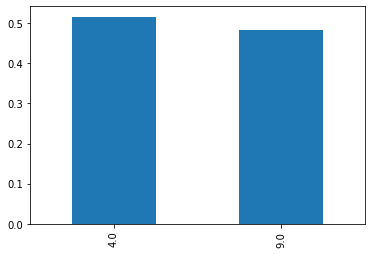

In [668]:
df_total_not.order_status_key.value_counts(normalize = True).plot(kind = "bar")

______________________

In [ ]:
#Доля отмена заказа клиентом составлет ~52%

____________________

<AxesSubplot:>

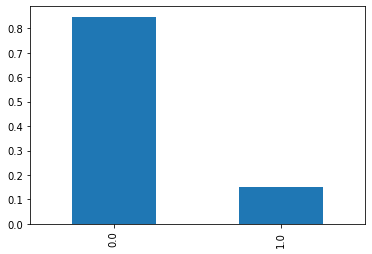

In [669]:
df_total_not.is_courier_assigned_key.value_counts(normalize = True).plot(kind = "bar") 

________________________

In [ ]:
#По данным датасета orders ~80% заказов которым были сформированы офферы учтены как is_courier_assigned_key = 0 (т.е. не назначены курьеры) - противоречие.....

____________________________________

**3.** Какова доля заказов с назначенным курьером среди заказов, отмененных системой?

In [ ]:
#далее ваш код

In [180]:
df_total.order_status_key.value_counts(normalize = True)

4    0.749671
9    0.250329
Name: order_status_key, dtype: float64

_____________________________________

In [ ]:
#Доля отмененных заказов системой составлет 25%

____________________________

**4**. Получите среднее времени до отмены (cancellations_time_in_seconds) с назначенным курьером и без, по часам.  Можно ли сделать выводы по полученной таблице?
Если необходимо - постройте график

In [ ]:
#далее ваш код

In [748]:
#Статистика по числовым данным времени
print("Среднее время до отмены заказа с назначенным курьером:", df_total.cancellations_time_in_seconds.mean())
print("Среднее время до отмены заказа без назначенного курьера:", df_total_not.cancellations_time_in_seconds.mean())

Среднее время до отмены заказа с назначенным курьером: 111.5969776609724
Среднее время до отмены заказа без назначенного курьера: 98.02446877012234


**5.** Постройте график распределения фейлов по часам - наблюдается ли тендеция, что в какие то часы доля той или иной категории аномально высока?

In [749]:
#далее ваш код

In [750]:
#работа с очищенными исходными данными
#df_orders_clear

In [751]:
#смотрим тип данных
print(df_orders_clear.dtypes)
df_orders_clear.order_datetime = pd.to_datetime(df_orders_clear.order_datetime)
#меняем на тип на datetime64
#сортируем в порядке возрастания по времени
df_orders_time = df_orders_clear.set_index('order_datetime')
df_orders_time.sort_values(by='order_datetime')

order_datetime                   datetime64[ns]
order_gk                                  int64
order_status_key                          int64
is_courier_assigned_key                   int64
cancellations_time_in_seconds           float64
dtype: object


,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
order_datetime,,,,
2020-07-22 00:00:02,3000585142206,9,0,0.0
2020-07-22 00:00:03,3000600112135,4,0,234.0
2020-07-22 00:00:05,3000617553045,4,0,120.0
2020-07-22 00:00:11,3000617553053,4,0,200.0
2020-07-22 00:00:16,3000625792879,4,0,152.0
...,...,...,...,...
2020-07-22 23:59:34,3000625141936,9,0,0.0
2020-07-22 23:59:40,3000630782037,4,0,240.0
2020-07-22 23:59:42,3000625792845,4,0,77.0


In [752]:
#разделяем таблицу по категориям
#4
df_filter_4 = df_orders_time.order_status_key.isin([int('4')])
df_filter_4 = df_orders_time[df_filter_4]
#9
df_filter_9 = df_orders_time.order_status_key.isin([int('9')])
df_filter_9 = df_orders_time[df_filter_9]

In [762]:
df_filter_9.sort_values(by = "order_datetime")

,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
order_datetime,,,,
2020-07-22 00:00:02,3000585142206,9,0,0.0
2020-07-22 00:00:29,3000595772161,9,0,0.0
2020-07-22 00:00:58,3000624492060,9,0,0.0
2020-07-22 00:01:35,3000555771864,9,0,0.0
2020-07-22 00:01:50,3000624492082,9,0,0.0
...,...,...,...,...
2020-07-22 23:58:56,3000617552998,9,0,0.0
2020-07-22 23:59:21,3000625792815,9,0,0.0
2020-07-22 23:59:22,3000630782022,9,0,0.0


In [761]:
df_filter_4.sort_values(by = "order_datetime")

,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
order_datetime,,,,
2020-07-22 00:00:03,3000600112135,4,0,234.0
2020-07-22 00:00:05,3000617553045,4,0,120.0
2020-07-22 00:00:11,3000617553053,4,0,200.0
2020-07-22 00:00:16,3000625792879,4,0,152.0
2020-07-22 00:00:39,3000586441253,4,1,206.0
...,...,...,...,...
2020-07-22 23:59:25,3000629482012,4,0,238.0
2020-07-22 23:59:40,3000630782037,4,0,240.0
2020-07-22 23:59:42,3000625792845,4,0,77.0


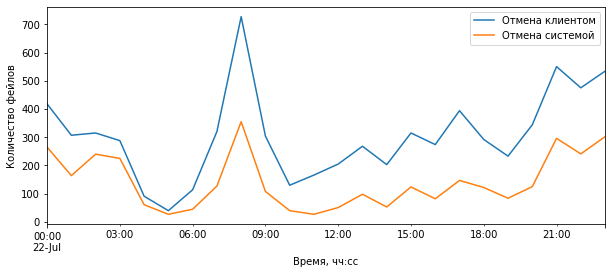

In [759]:
#задается период округления (по часам) и агрегатная функция подсчета количества
df_orders_time_1H_4 = df_filter_4.resample('1H').count()
df_orders_time_1H_9 = df_filter_9.resample('1H').count()
#построение графика
plt.figure(figsize=(10,4))
df_orders_time_1H_4.order_gk.plot(label='Отмена клиентом')
df_orders_time_1H_9.order_gk.plot(label='Отмена системой')
plt.xlabel('Время, чч:сс')
plt.ylabel('Количество фейлов')
plt.legend()
plt.show()

In [755]:
print(df_orders_time_1H_4.order_gk.idxmax())
print(df_orders_time_1H_9.order_gk.idxmax())

2020-07-22 08:00:00
2020-07-22 08:00:00


In [ ]:
#Наибольшее количество отмен заказов приходится на дату 2020-07-22 08:00:00;
#Ближе к времени 00:00 наблюдается тренд роста количества отмен;

In [742]:
#Заметна явная корреляция данных по признаку order_status_key